# 1. LOAD PACKAGES AND LIBRARIES 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
df_train=pd.read_csv('KDDTrain+.txt')
df_test=pd.read_csv('KDDTest+.txt')

In [3]:
df_train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
df_test

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


# 2. PREPROCESSING 

In [5]:
### ADDING COLUMNS IN DATASETS

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
            'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
            'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
            'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

df_train.columns = columns
df_test.columns = columns

In [6]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [9]:
### CHECKING DUPLICATE VALUE IN DATASETS

print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [27]:
### CHECKING NULL VALUE IN DATASETS

print(df_train.isnull().values.sum())
print(df_test.isnull().values.sum())

0
0


In [17]:
### MORE INFO ABOUT TRAINING DATASET

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

2.1 VISUALIZATION OF CATEGORICAL DATA AND THEIR RELATION BETWEEN EACH OTHER

In [28]:
df_train['protocol_type'].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

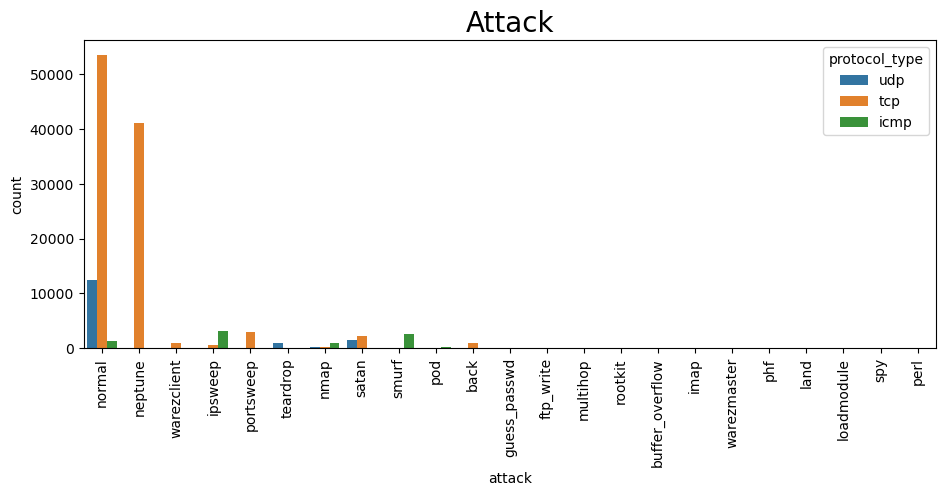

In [30]:
plt.figure(figsize=(11,4))
sns.countplot(x='attack',data=df_train,hue='protocol_type')
plt.xticks(rotation=90)
plt.title('Attack',fontdict={'fontsize':20})
plt.show()

In [31]:
df_train['service'].unique()

array(['other', 'private', 'http', 'remote_job', 'ftp_data', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

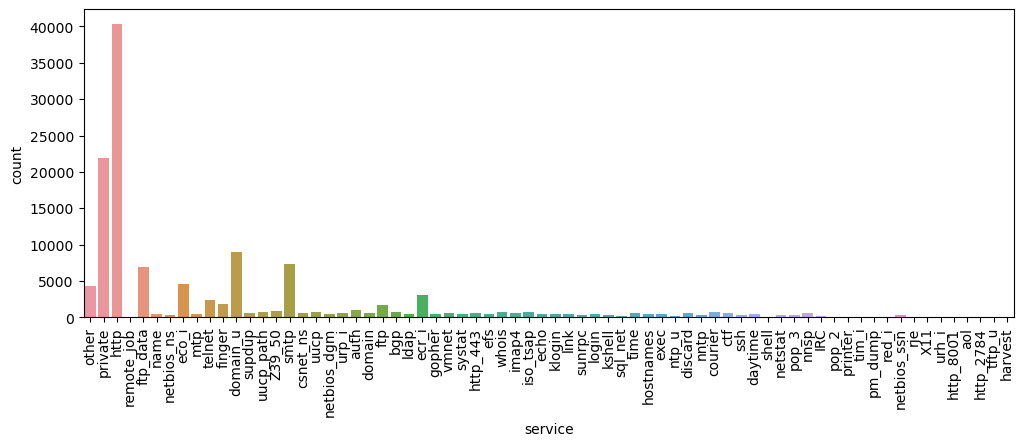

In [32]:
plt.figure(figsize=(12,4))
t = sns.countplot(x='service', data = df_train)
t.set_xticklabels(t.get_xticklabels(),rotation=90);

In [33]:
df_train['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [34]:
df_train['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

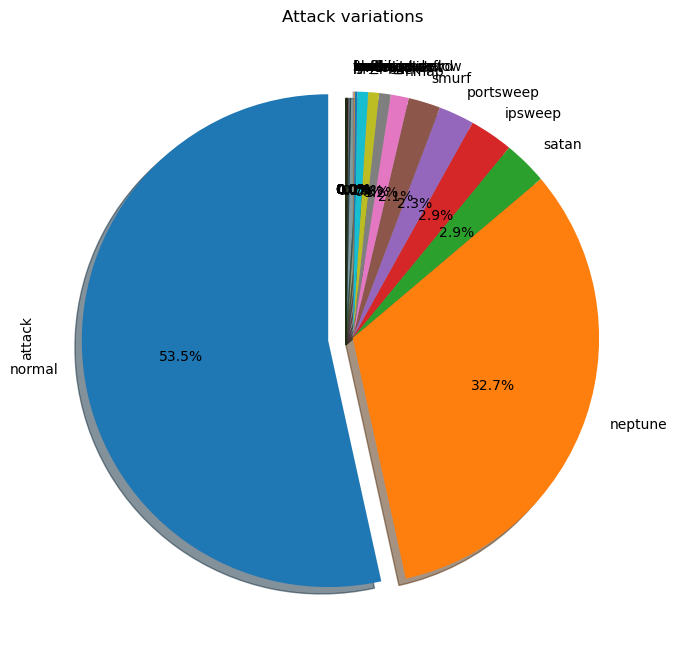

In [35]:
plt.figure(figsize = (8,8))
r = df_train.attack.value_counts().plot(kind='pie',shadow=True, explode=(0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0), 
                                        startangle=90,autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(),rotation=90);
plt.title('Attack variations')
plt.show()

In [36]:
### Convert other abnormal classes to one class

df_train["attack"]=df_train.attack.map(lambda a: "normal" if a == 'normal' else "malicious")
df_test["attack"]=df_test.attack.map(lambda a: "normal" if a == 'normal' else "malicious")

In [37]:
df_train['attack']

0            normal
1         malicious
2            normal
3            normal
4         malicious
            ...    
125967    malicious
125968       normal
125969       normal
125970    malicious
125971       normal
Name: attack, Length: 125972, dtype: object

In [38]:
df_test['attack']

0        malicious
1           normal
2        malicious
3        malicious
4           normal
           ...    
22538       normal
22539       normal
22540    malicious
22541       normal
22542    malicious
Name: attack, Length: 22543, dtype: object

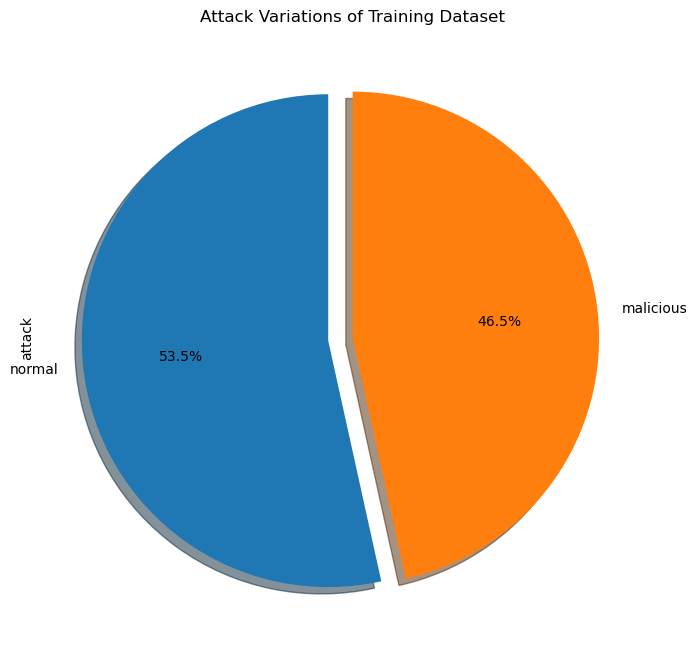

In [39]:
plt.figure(figsize = (8,8))
r = df_train.attack.value_counts().plot(kind='pie',shadow=True, explode=(0.1, 0), startangle=90,autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(),rotation=90);
plt.title('Attack Variations of Training Dataset')
plt.show()

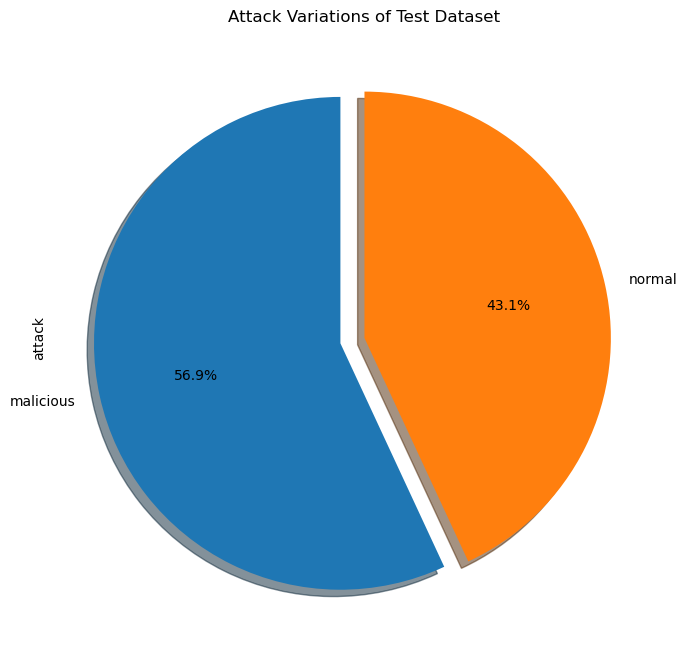

In [40]:
plt.figure(figsize = (8,8))
r = df_test.attack.value_counts().plot(kind='pie',shadow=True, explode=(0.1, 0), startangle=90,autopct='%1.1f%%')
r.set_xticklabels(r.get_xticklabels(),rotation=90);
plt.title('Attack Variations of Test Dataset')
plt.show()

In [41]:
print(df_train['attack'].value_counts())
print(df_test['attack'].value_counts())

normal       67342
malicious    58630
Name: attack, dtype: int64
malicious    12832
normal        9711
Name: attack, dtype: int64


In [42]:
print(df_train.shape)
print(df_test.shape)

(125972, 43)
(22543, 43)


2.2 OUTLIERS DETECTION 

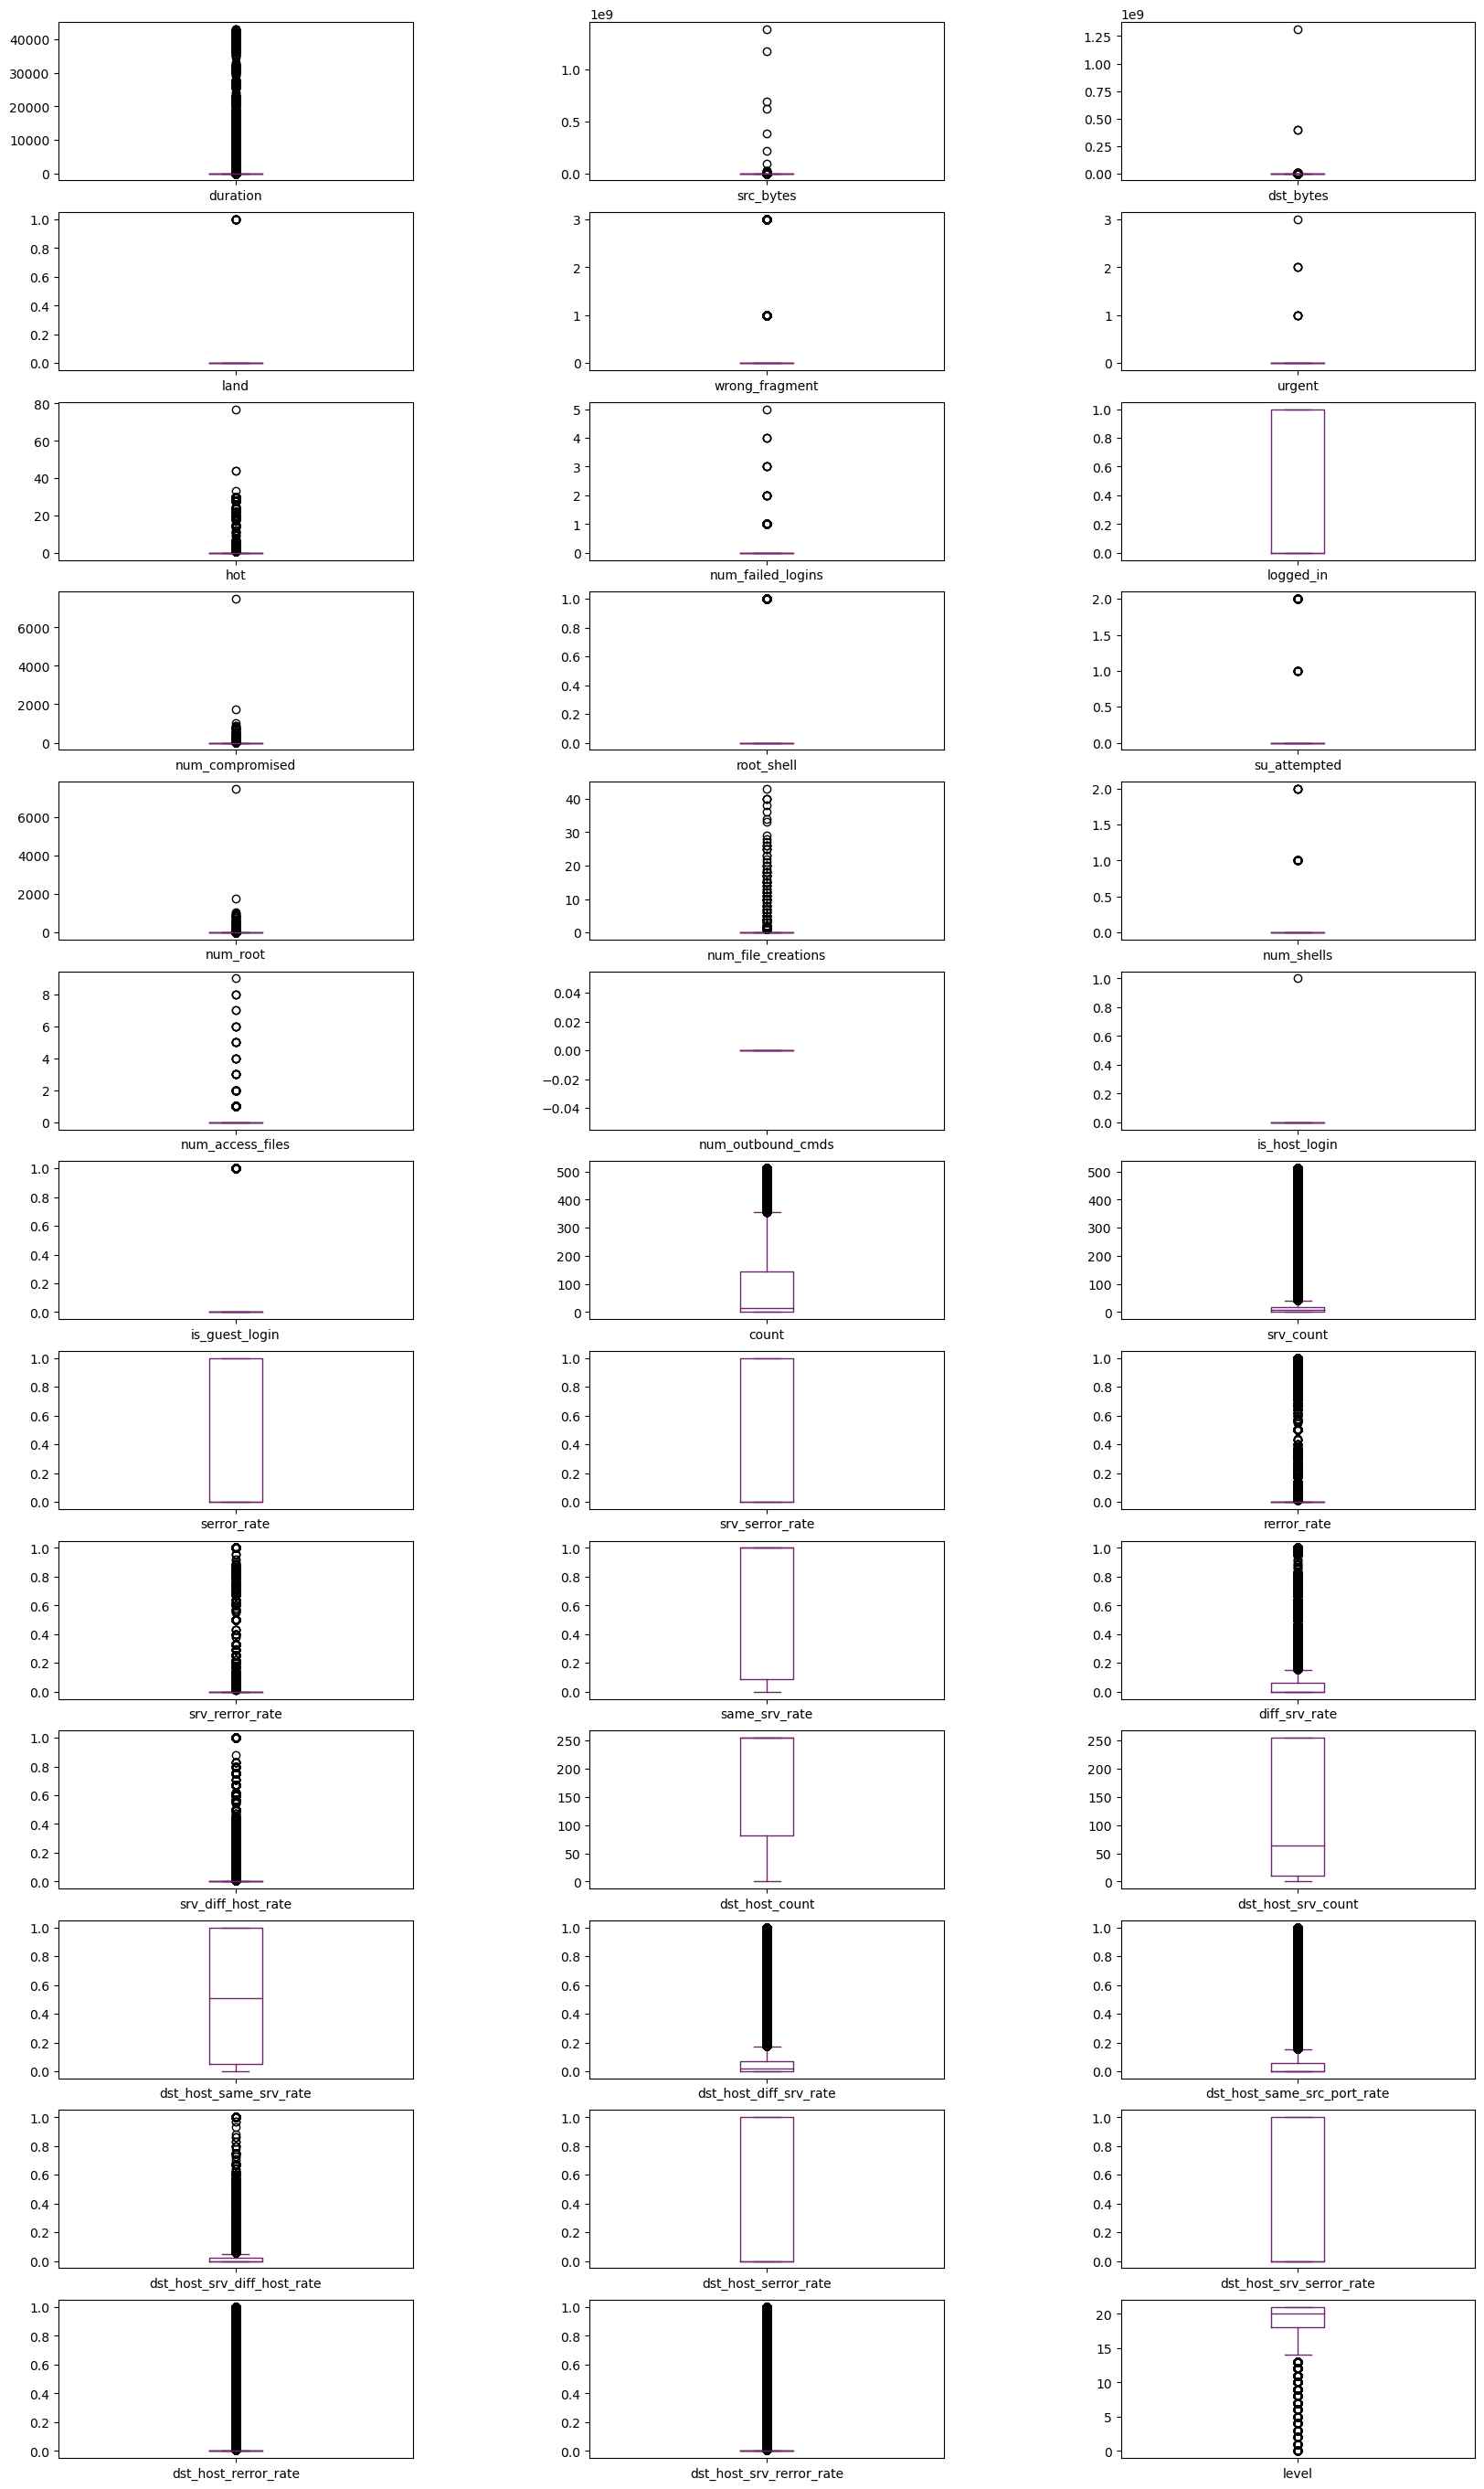

In [43]:
### To look for Outliers we used Boxplot 

nums = df_train.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,3), figsize = (20,40), patch_artist= False ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

# 3. ENCODING

In [44]:
# Label Encoder

le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

In [45]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0,21


In [46]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0,21
1,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1,21
2,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0,15
3,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0,11
4,0,1,22,9,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1,21


# 4. SPLITTING

In [47]:
#Spliting the data

x_train=df_train.drop('attack',axis=1)
y_train=df_train["attack"]

x_test=df_test.drop('attack',axis=1)
y_test=df_test["attack"]

In [48]:
x_train.shape

(125972, 42)

In [49]:
y_train.shape

(125972,)

In [50]:
x_test.shape

(22543, 42)

In [51]:
y_test.shape

(22543,)

# 5. FEATURE ENGINEERING

In [52]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.566576
service                        0.468454
dst_bytes                      0.439441
flag                           0.373004
same_srv_rate                  0.360663
diff_srv_rate                  0.358570
dst_host_srv_count             0.335485
dst_host_same_srv_rate         0.307463
dst_host_diff_srv_rate         0.284499
logged_in                      0.284499
dst_host_serror_rate           0.284392
dst_host_srv_serror_rate       0.278792
serror_rate                    0.274589
count                          0.265307
srv_serror_rate                0.265057
dst_host_srv_diff_host_rate    0.188111
level                          0.154878
dst_host_count                 0.143129
dst_host_same_src_port_rate    0.129686
srv_diff_host_rate             0.099237
srv_count                      0.062909
dst_host_srv_rerror_rate       0.060992
protocol_type                  0.054779
rerror_rate                    0.039163
srv_rerror_rate                0.035577


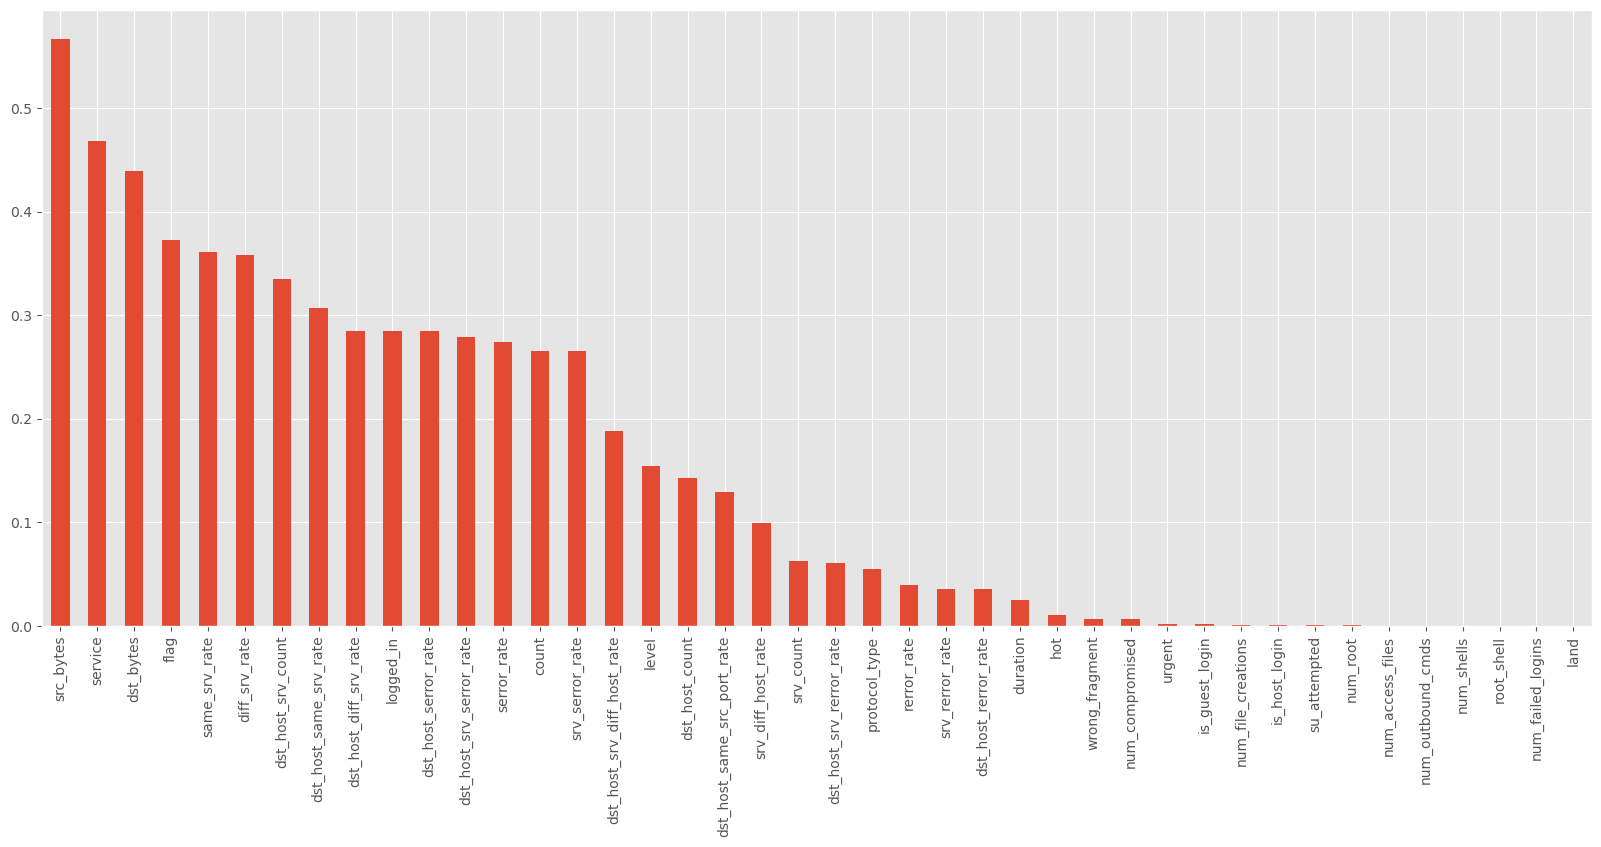

In [53]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [54]:
# We choosed 20 features to select

sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'level'],
      dtype='object')

In [56]:
col=['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'level']
x_train=x_train[col]
x_test=x_test[col]

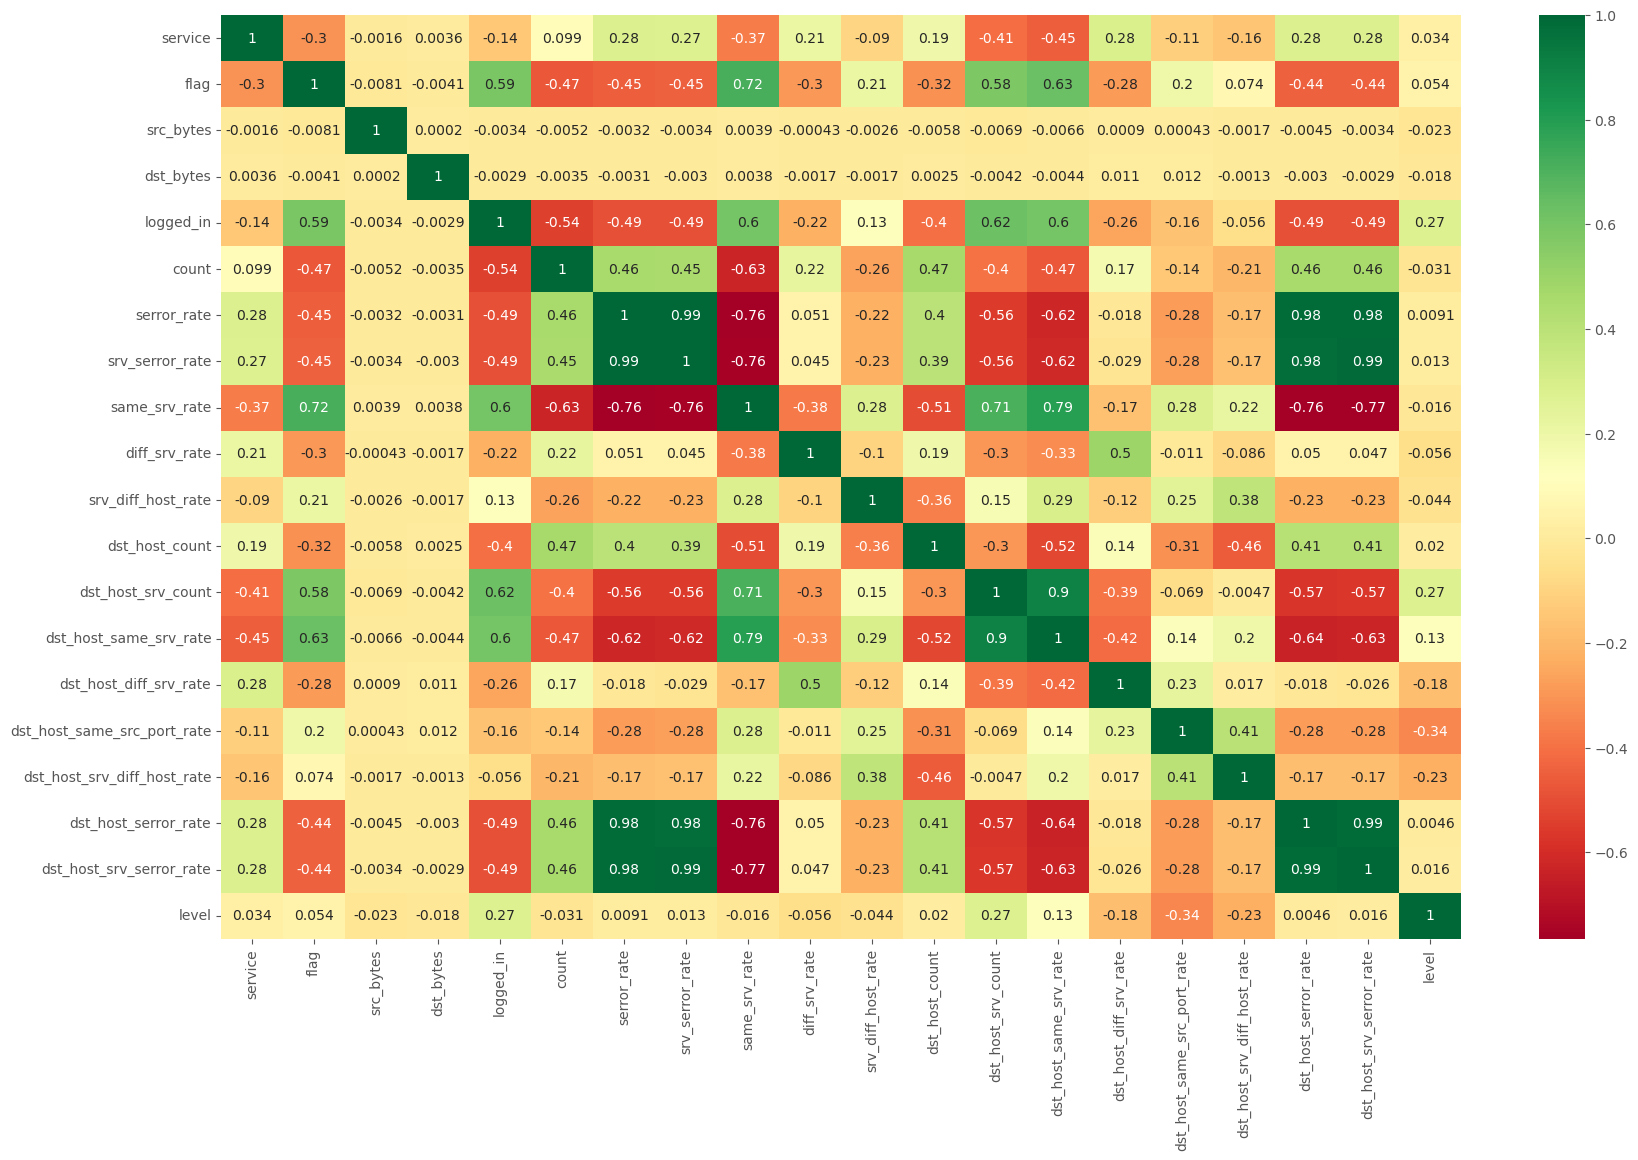

In [57]:
plt.figure(figsize=(20,12))
p=sns.heatmap(x_train.corr(), annot=True,cmap ='RdYlGn')

# 6. SCALING

In [58]:
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

# 7. BINARY CLASSIFICATION MODELS

In [59]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines linear'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

In [60]:
# we'll loop over each one, train it by calling .fit(), make predictions, calculate metrics, and store each result in a dictionary.
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(x_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(x_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [61]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.842257,0.916795,0.764140
Support Vector Machines linear,0.832187,0.918031,0.749034
Decision Trees,0.862884,0.906498,0.801293
Random Forest,0.827175,0.968489,0.723740
Naive Bayes,0.608038,0.427247,0.558938
K-Nearest Neighbor,0.838265,0.970240,0.737303


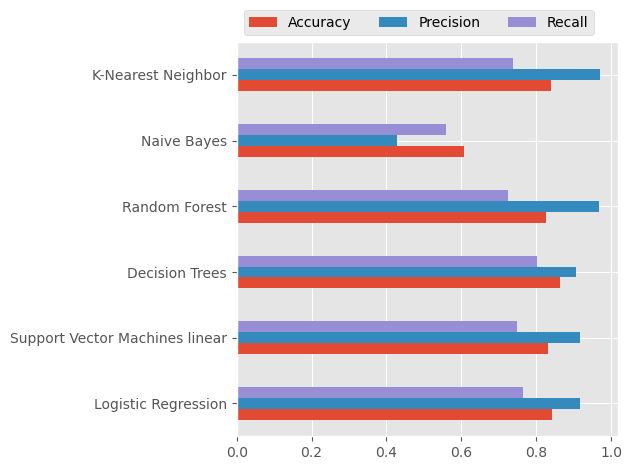

In [62]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()

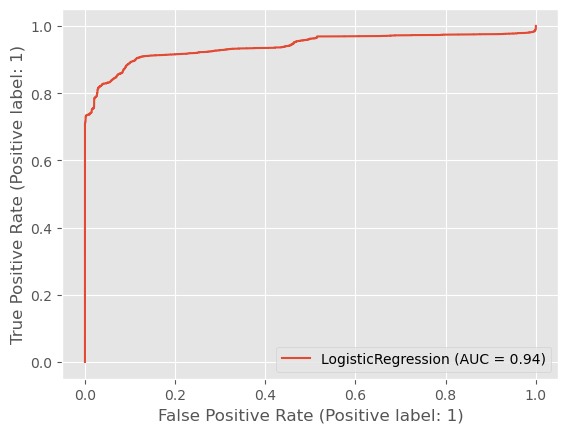

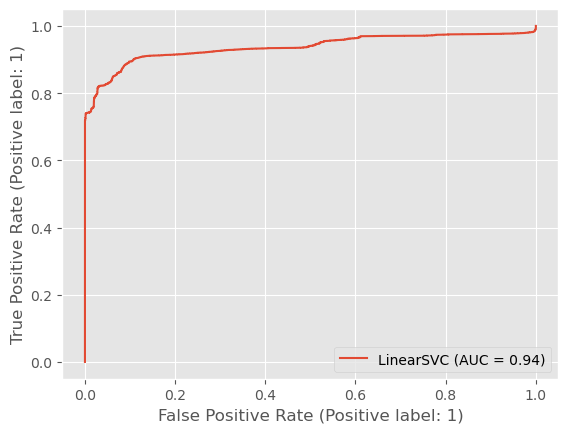

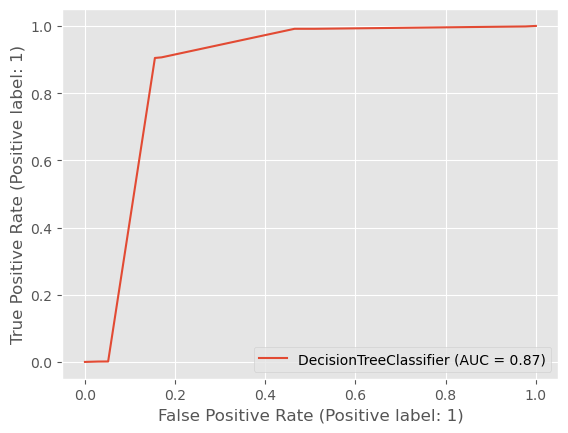

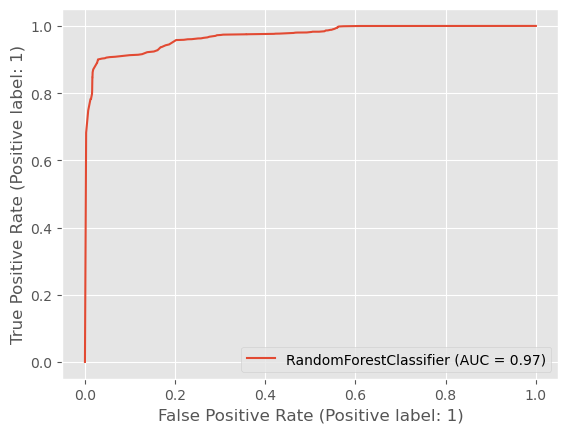

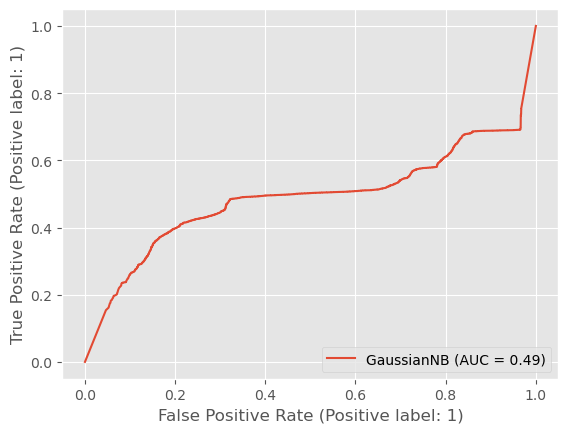

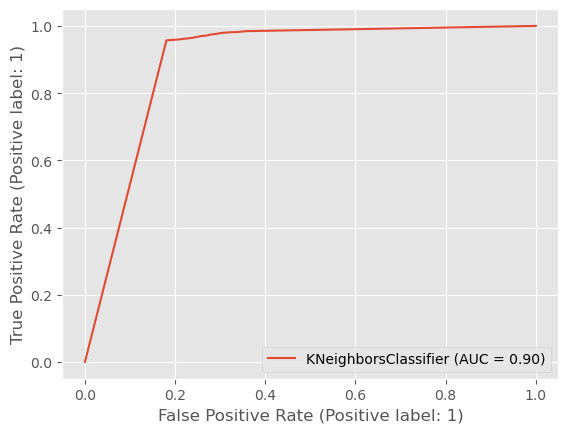

In [63]:
for key in models.keys():
    plot_roc_curve( models[key], x_test, y_test)